### ARIMA 
Auto-Regressive Integrated Moving Average 
 - Arima is based on the assumption that the model is *stationary*

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

In [2]:
# Testing with tomorrows data
ticker =  "AMZN"
today = date.today()

amzn = yf.download(ticker, start = "2020-01-01", end = today )

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2020-01-02 to 2025-05-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1348 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


<Axes: xlabel='Date'>

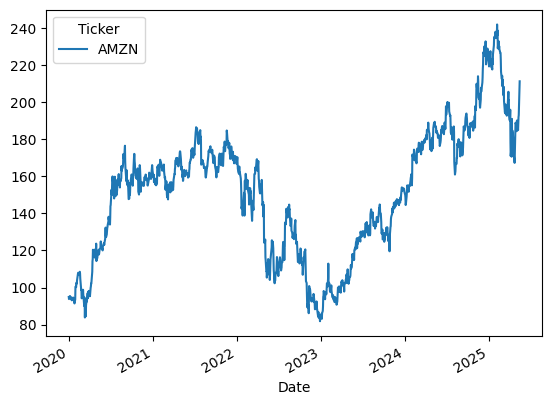

In [3]:
df = amzn['Close']
df.info()
df.plot()

<Axes: xlabel='Date'>

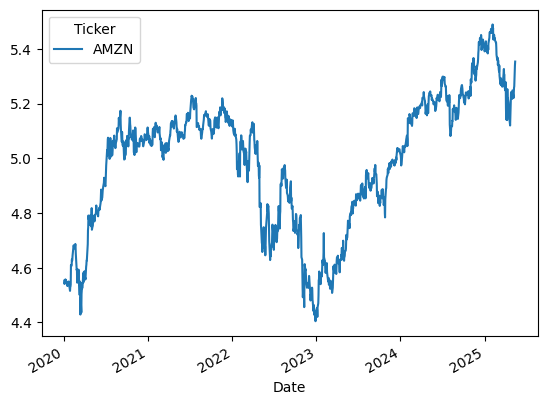

In [4]:
df = np.log(df)
df.plot()

In [ ]:
n = 0.8
split_idx = int(n * len(df))
df_train = df[:split_idx].copy()
df_test = df[split_idx:].copy()


1348
1078
270


#### Checking for stationarity using the ACF and PACF plots

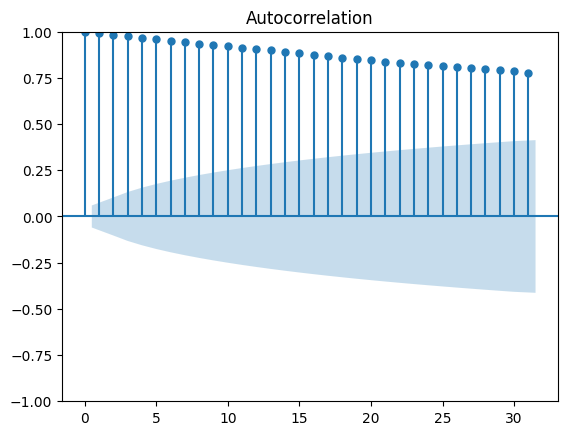

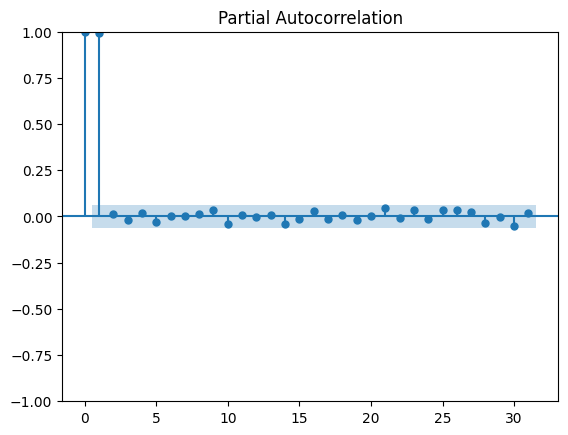

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(df_train)
pact_plot = plot_pacf(df_train)

This is a strong suggestion that the graph is a random walk

### ADF Test to test for stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')


p-value: 0.32038845712899944


Transforming the data to stationary data by differencing it

<Axes: xlabel='Date'>

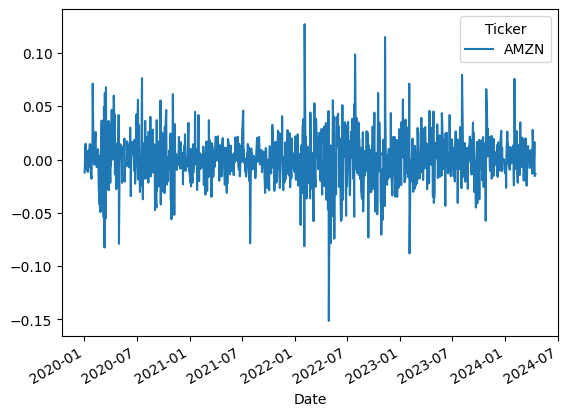

In [15]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

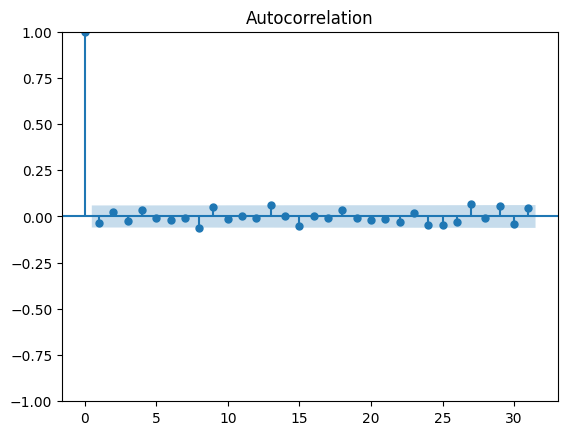

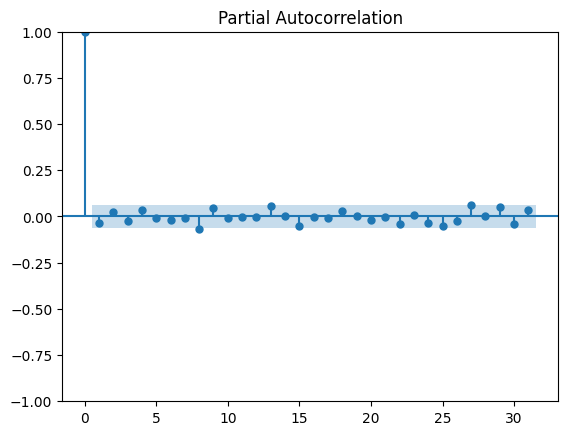

In [16]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [17]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]:.5f}')

p-value: 0.00000


With this, we can set the d term in the ARIMA model as 1, as it is differentiated only once
### ARIMA (p, 1, q)

<Axes: xlabel='Date'>

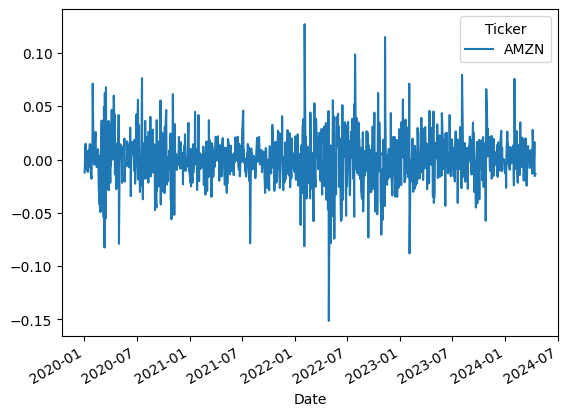

In [18]:
df_train_diff.plot()

## Fitting the ARIMA Model

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order = (1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                 1078
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2521.355
Date:                Wed, 14 May 2025   AIC                          -5038.710
Time:                        22:34:24   BIC                          -5028.746
Sample:                             0   HQIC                         -5034.937
                               - 1078                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0353      0.024     -1.477      0.140      -0.082       0.012
sigma2         0.0005   1.46e-05     37.031      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\aillon.o\MyGitProjects\Stock-Price-Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


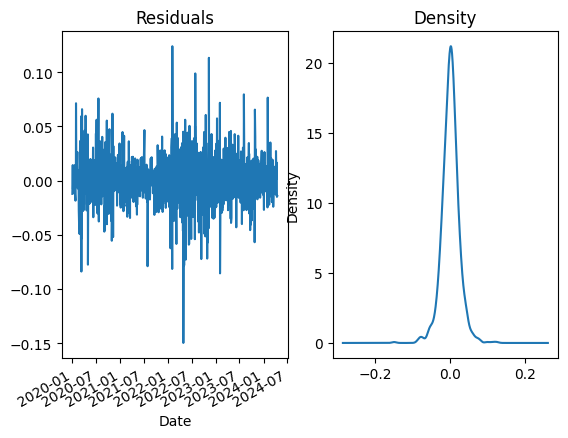

In [26]:
residuals = model_fit.resid[1:]
fix, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plt.show()

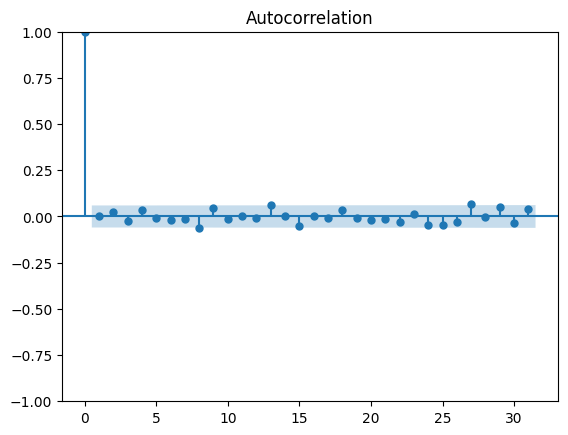

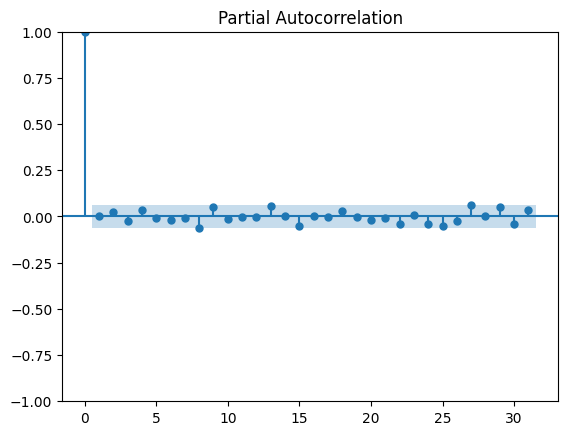

In [27]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

c:\Users\aillon.o\MyGitProjects\Stock-Price-Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\aillon.o\MyGitProjects\Stock-Price-Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

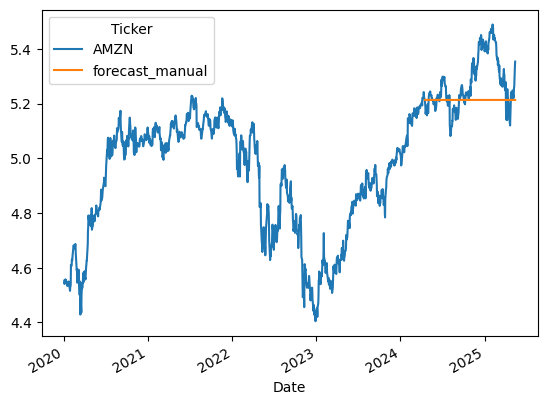

In [28]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None] * len(df_train) + list(forecast_test)
df.plot()

## Auto-fitting an ARIMA Model

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise = False, seaso)